# Heart Disease Predictiion

## About the data

#### There are 11 atributes
#### age: age in years
#### sex: sex (M = male; F = female)
#### ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
#### RestingBP: resting blood pressure (mm Hg)
#### Cholesterol: serum cholesterol (mm/dl)
#### FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
#### RestingECG: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
#### MaxHR: maximum heart rate achieved (Numeric value between 60 and 202)
#### ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
#### Oldpeak: oldpeak = ST (Numeric value measured in depression)
#### ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping) atic

### The target atribute
#### HeartDisease: output class (1: heart disease, 0: Normal)

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
# load data
df=pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [81]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [83]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [84]:
df.duplicated().sum()

0

In [85]:
df.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

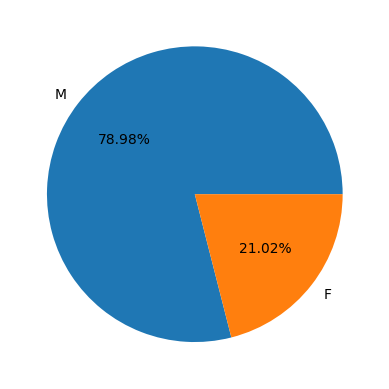

In [86]:
plt.pie(df.Sex.value_counts(),labels=df.Sex.value_counts().index,autopct="%1.2f%%")
plt.show()

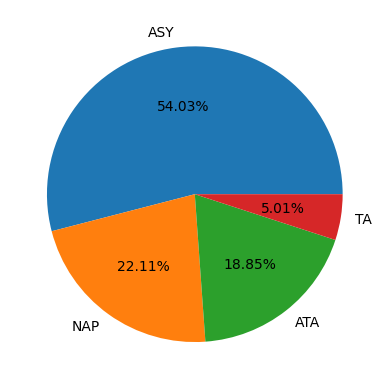

In [87]:
plt.pie(df.ChestPainType.value_counts(),labels=df.ChestPainType.value_counts().index,autopct="%1.2f%%")
plt.show()

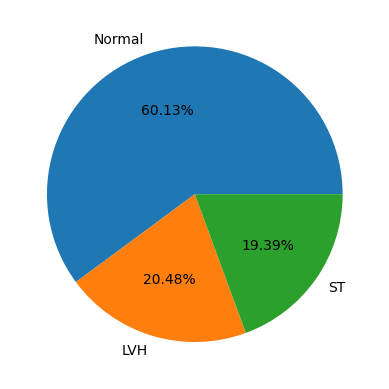

In [88]:
plt.pie(df.RestingECG.value_counts(),labels=df.RestingECG.value_counts().index,autopct="%1.2f%%")
plt.show()

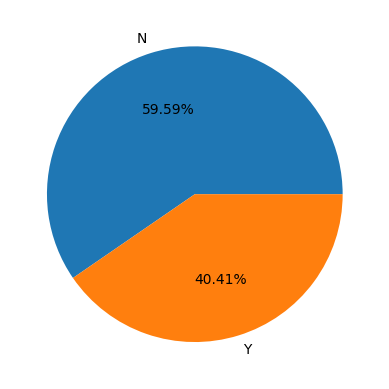

In [89]:
plt.pie(df.ExerciseAngina.value_counts(),labels=df.ExerciseAngina.value_counts().index,autopct="%1.2f%%")
plt.show()

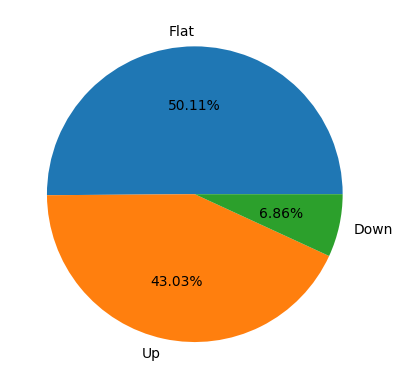

In [90]:
plt.pie(df.ST_Slope.value_counts(),labels=df.ST_Slope.value_counts().index,autopct="%1.2f%%")
plt.show()

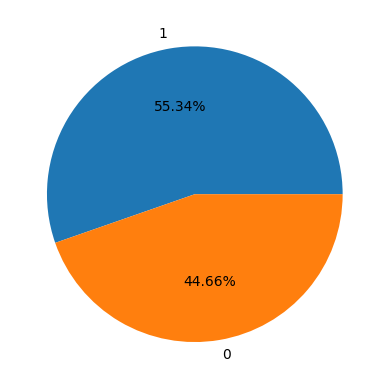

In [91]:
plt.pie(df.HeartDisease.value_counts(),labels=df.HeartDisease.value_counts().index,autopct="%1.2f%%")
plt.show()

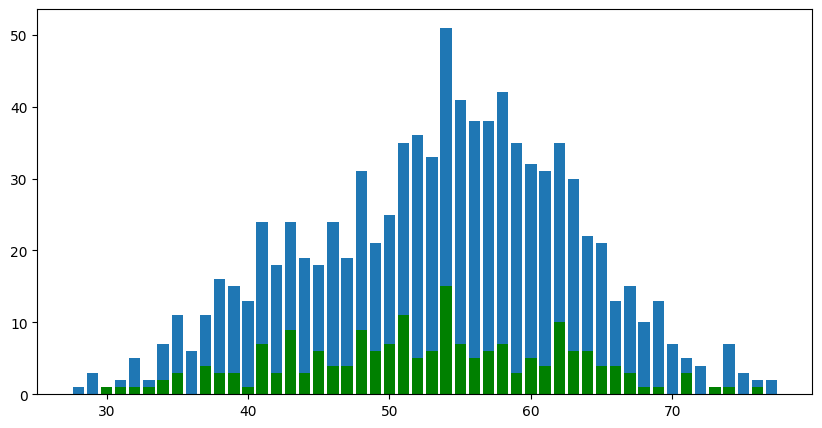

In [92]:
plt.figure(figsize=(10,5))
plt.bar(df.Age.value_counts().index,df.Age.value_counts())
plt.bar(df[df['Sex']=='F'].Age.value_counts().index,df[df['Sex']=='F'].Age.value_counts(),color='green')
plt.show()

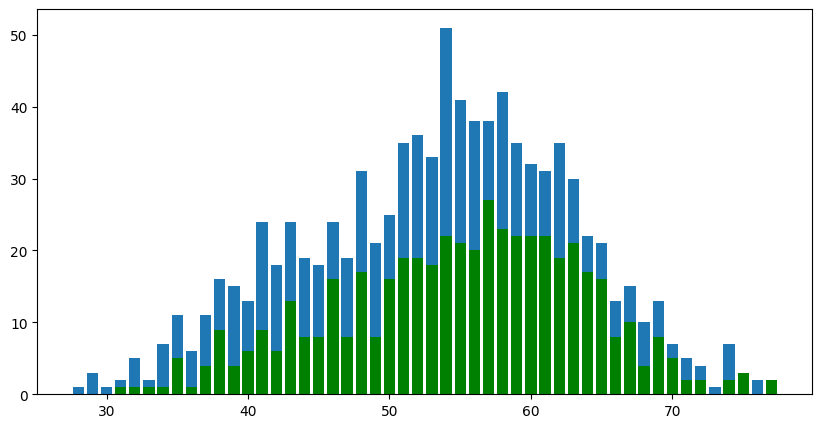

In [93]:
plt.figure(figsize=(10,5))
plt.bar(df.Age.value_counts().index,df.Age.value_counts())
plt.bar(df[df['ChestPainType']=='ASY'].Age.value_counts().index,df[df['ChestPainType']=='ASY'].Age.value_counts(),color='green')
plt.show()

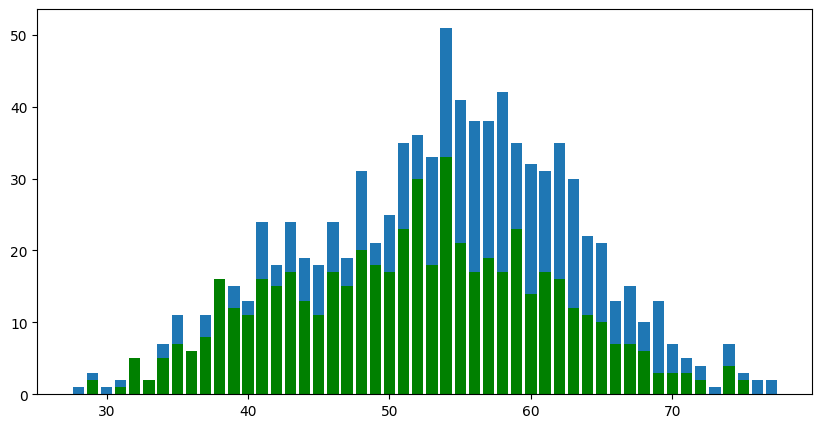

In [94]:
plt.figure(figsize=(10,5))
plt.bar(df.Age.value_counts().index,df.Age.value_counts())
plt.bar(df[df['RestingECG']=='Normal'].Age.value_counts().index,df[df['RestingECG']=='Normal'].Age.value_counts(),color='green')
plt.show()

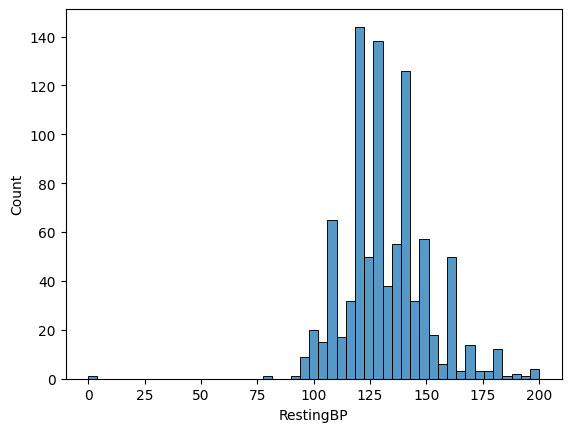

In [95]:
sns.histplot(df.RestingBP)
plt.show()

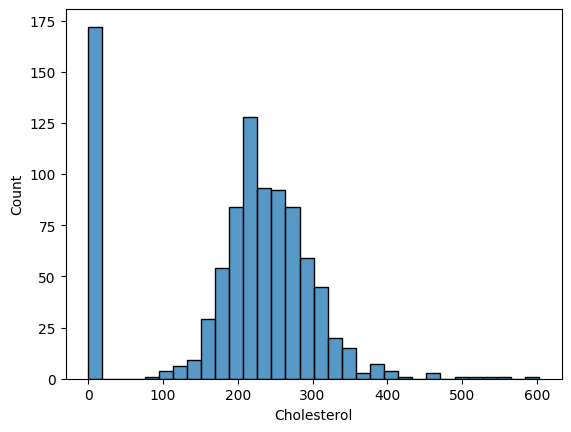

In [96]:
sns.histplot(df.Cholesterol)
plt.show()

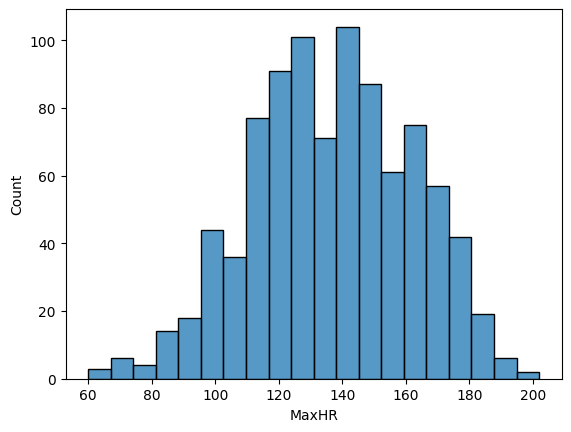

In [97]:
sns.histplot(df.MaxHR)
plt.show()

In [98]:
df['Sex']=df['Sex'].map({'M' : 1,'F' : 0})
df['ExerciseAngina']=df['ExerciseAngina'].map({'N' : 0,'Y' : 1})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [99]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [100]:
df['ChestPainType']=df['ChestPainType'].map({'TA' : 0,'ATA' : 1,'NAP' : 2,'ASY' : 3})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,2,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,1,130,283,0,ST,98,0,0.0,Up,0
3,48,0,3,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,2,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,3,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,3,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,1,130,236,0,LVH,174,0,0.0,Flat,1


In [101]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [102]:
df['RestingECG']=df['RestingECG'].map({'Normal' : 0,'ST' : 1,'LVH' : 2})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,Up,0
1,49,0,2,160,180,0,0,156,0,1.0,Flat,1
2,37,1,1,130,283,0,1,98,0,0.0,Up,0
3,48,0,3,138,214,0,0,108,1,1.5,Flat,1
4,54,1,2,150,195,0,0,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,Flat,1
914,68,1,3,144,193,1,0,141,0,3.4,Flat,1
915,57,1,3,130,131,0,0,115,1,1.2,Flat,1
916,57,0,1,130,236,0,2,174,0,0.0,Flat,1


In [103]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [104]:
df['ST_Slope']=df['ST_Slope'].map({'Up' : 0,'Flat' : 1,'Down' : 2})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,1,1
914,68,1,3,144,193,1,0,141,0,3.4,1,1
915,57,1,3,130,131,0,0,115,1,1.2,1,1
916,57,0,1,130,236,0,2,174,0,0.0,1,1


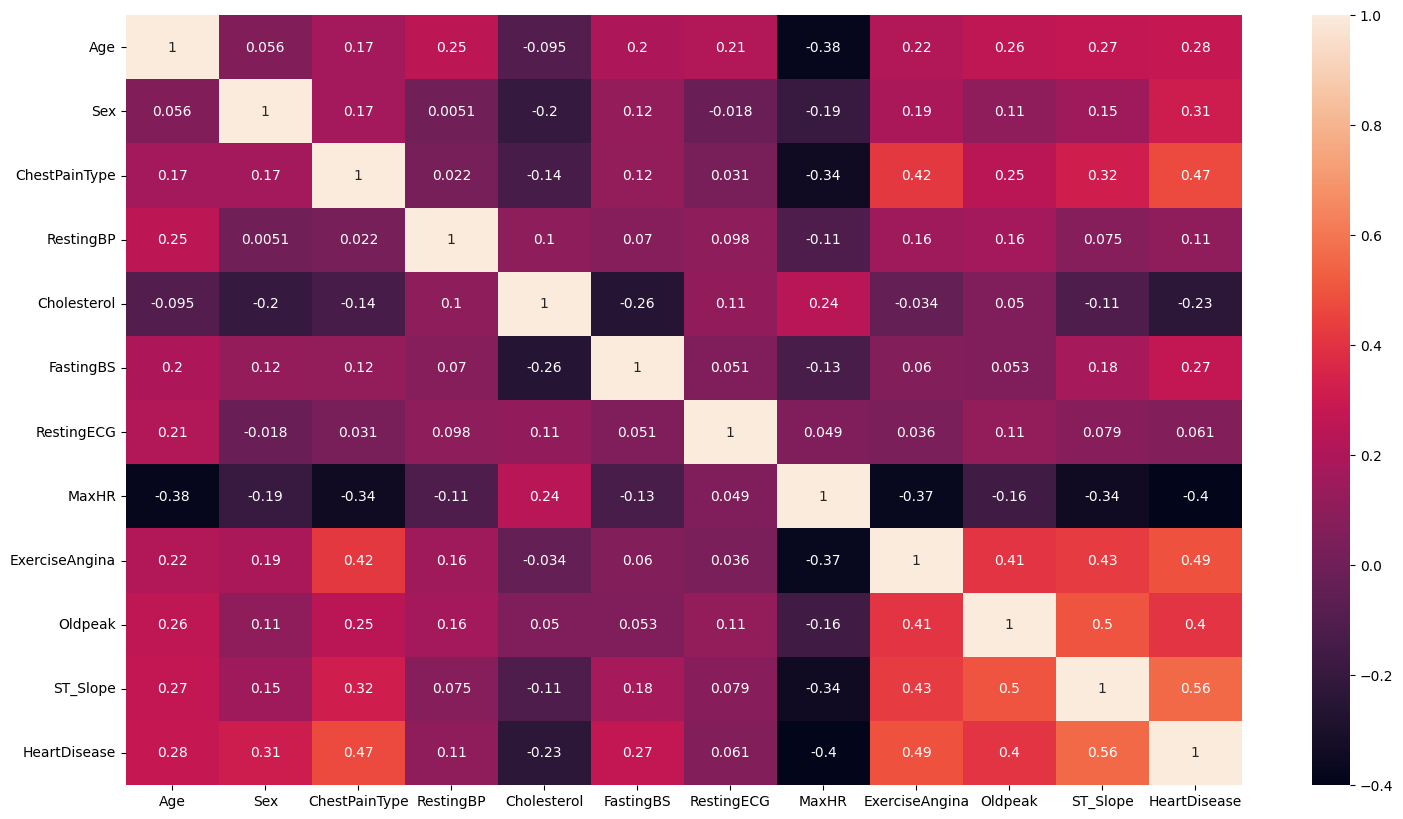

In [105]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### We will take age, sex, ChestPainType, FastingBS, MaxHR, Oldpeak and ST_Slope as our independent variable

In [106]:
df.drop(columns=['RestingBP','Cholesterol','RestingECG','ExerciseAngina'],inplace=True)
df

,Age,Sex,ChestPainType,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,0,172,0.0,0,0
1,49,0,2,0,156,1.0,1,1
2,37,1,1,0,98,0.0,0,0
3,48,0,3,0,108,1.5,1,1
4,54,1,2,0,122,0.0,0,0
...,...,...,...,...,...,...,...,...
913,45,1,0,0,132,1.2,1,1
914,68,1,3,1,141,3.4,1,1
915,57,1,3,0,115,1.2,1,1
916,57,0,1,0,174,0.0,1,1


In [107]:
X=df.drop(columns=['HeartDisease'])
X

,Age,Sex,ChestPainType,FastingBS,MaxHR,Oldpeak,ST_Slope
0,40,1,1,0,172,0.0,0
1,49,0,2,0,156,1.0,1
2,37,1,1,0,98,0.0,0
3,48,0,3,0,108,1.5,1
4,54,1,2,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,1,0,0,132,1.2,1
914,68,1,3,1,141,3.4,1
915,57,1,3,0,115,1.2,1
916,57,0,1,0,174,0.0,1


In [108]:
y=df['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [111]:
X_train_transform=scaler.fit_transform(X_train)
X_test_transform=scaler.transform(X_test)

## Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [113]:
logreg.fit(X_train_transform,y_train)

LogisticRegression()

In [114]:
y_pred=logreg.predict(X_test_transform)

In [115]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [116]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8586956521739131

In [117]:
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))
print('Classification Report : \n',classification_report(y_test,y_pred))

Confusion Matrix : 
 [[68  9]
 [17 90]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [118]:
from sklearn.metrics import precision_score,recall_score
print('Precision : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))

Precision :  0.9090909090909091
Recall :  0.8411214953271028


In [119]:
performance=pd.DataFrame()
performance['Model']=['LogisticRegression']
performance['accuracy']=[accuracy_score(y_test,y_pred)]
performance['Precision']=[precision_score(y_test,y_pred)]
performance['Recall']=[recall_score(y_test,y_pred)]
performance

,Model,accuracy,Precision,Recall
0,LogisticRegression,0.858696,0.909091,0.841121


## Support Vector Machine

In [120]:
from sklearn.svm import SVC
svc1=SVC(kernel='linear')
svc2=SVC(kernel='rbf')
svc3=SVC(kernel='poly')

In [121]:
svc1.fit(X_train_transform,y_train)
svc2.fit(X_train_transform,y_train)
svc3.fit(X_train_transform,y_train)

SVC(kernel='poly')

In [122]:
y_pred1=svc1.predict(X_test_transform)
y_pred2=svc2.predict(X_test_transform)
y_pred3=svc3.predict(X_test_transform)

In [123]:
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred1))
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred2))
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred3))
print('Classification Report : \n',classification_report(y_test,y_pred1),classification_report(y_test,y_pred2),classification_report(y_test,y_pred3))

Confusion Matrix : 
 [[69  8]
 [20 87]]
Confusion Matrix : 
 [[66 11]
 [17 90]]
Confusion Matrix : 
 [[58 19]
 [14 93]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.90      0.83        77
           1       0.92      0.81      0.86       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184
               precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        77
           1       0.83      0.87      0.85       107

    accuracy                        

In [124]:
dict={
    'Model':['SVC_linear','SVC_rbf','SVC_poly'],
    'accuracy':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3)],
    'Precision':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),precision_score(y_test,y_pred3)],
    'Recall':[recall_score(y_test,y_pred1),recall_score(y_test,y_pred2),recall_score(y_test,y_pred3)]
}
temp=pd.DataFrame(dict)
performance=pd.concat([performance,temp])
performance

,Model,accuracy,Precision,Recall
0,LogisticRegression,0.858696,0.909091,0.841121
0,SVC_linear,0.847826,0.915789,0.813084
1,SVC_rbf,0.847826,0.891089,0.841121
2,SVC_poly,0.820652,0.830357,0.869159


## K Nearest Neighbour

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
for i in range(10,50,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_transform,y_train)
    pred=knn.predict(X_test_transform)
    print(f"for k={i} accuracy={accuracy_score(y_test,pred)} precision={precision_score(y_test,pred)} recall={recall_score(y_test,pred)}")

for k=10 accuracy=0.8315217391304348 precision=0.9318181818181818 recall=0.7663551401869159
for k=12 accuracy=0.8478260869565217 precision=0.9540229885057471 recall=0.7757009345794392
for k=14 accuracy=0.8369565217391305 precision=0.9325842696629213 recall=0.7757009345794392
for k=16 accuracy=0.8315217391304348 precision=0.9222222222222223 recall=0.7757009345794392
for k=18 accuracy=0.8478260869565217 precision=0.9247311827956989 recall=0.8037383177570093
for k=20 accuracy=0.8586956521739131 precision=0.9263157894736842 recall=0.822429906542056
for k=22 accuracy=0.8532608695652174 precision=0.9166666666666666 recall=0.822429906542056
for k=24 accuracy=0.8478260869565217 precision=0.9247311827956989 recall=0.8037383177570093
for k=26 accuracy=0.8478260869565217 precision=0.9157894736842105 recall=0.8130841121495327
for k=28 accuracy=0.8532608695652174 precision=0.9081632653061225 recall=0.8317757009345794
for k=30 accuracy=0.8532608695652174 precision=0.9166666666666666 recall=0.8224299

#### Since this is a heart disease prediction model so we have to focus on the recall value more than the precision
#### for k = 34 we are achieving the best

In [127]:
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train_transform,y_train)
y_pred=knn.predict(X_test_transform)

In [128]:
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))
print('Classification Report : \n',classification_report(y_test,y_pred))

Confusion Matrix : 
 [[69  8]
 [18 89]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        77
           1       0.92      0.83      0.87       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [129]:
dict={
    'Model':['KNN_34'],
    'accuracy':[accuracy_score(y_test,y_pred)],
    'Precision':[precision_score(y_test,y_pred)],
    'Recall':[recall_score(y_test,y_pred)]
}
temp=pd.DataFrame(dict)
performance=pd.concat([performance,temp])
performance

,Model,accuracy,Precision,Recall
0,LogisticRegression,0.858696,0.909091,0.841121
0,SVC_linear,0.847826,0.915789,0.813084
1,SVC_rbf,0.847826,0.891089,0.841121
2,SVC_poly,0.820652,0.830357,0.869159
0,KNN_34,0.858696,0.917526,0.831776


## Naive Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB

In [131]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

In [132]:
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))
print('Classification Report : \n',classification_report(y_test,y_pred))

Confusion Matrix : 
 [[69  8]
 [20 87]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.90      0.83        77
           1       0.92      0.81      0.86       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



In [133]:
dict={
    'Model':['NaiveBayes'],
    'accuracy':[accuracy_score(y_test,y_pred)],
    'Precision':[precision_score(y_test,y_pred)],
    'Recall':[recall_score(y_test,y_pred)]
}
temp=pd.DataFrame(dict)
performance=pd.concat([performance,temp])
performance

,Model,accuracy,Precision,Recall
0,LogisticRegression,0.858696,0.909091,0.841121
0,SVC_linear,0.847826,0.915789,0.813084
1,SVC_rbf,0.847826,0.891089,0.841121
2,SVC_poly,0.820652,0.830357,0.869159
0,KNN_34,0.858696,0.917526,0.831776
0,NaiveBayes,0.847826,0.915789,0.813084


## Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [135]:
clf=DecisionTreeClassifier()

In [136]:
param_dict={
    "criterion":['gini','entropy'],
    "max_depth":[2,3,4,5,6,10,None]
}

In [137]:
grid=GridSearchCV(clf,param_grid=param_dict,cv=10)

In [138]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10, None]})

In [139]:
grid.best_score_

0.8513698630136985

In [140]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [141]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [142]:
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))
print('Classification Report : \n',classification_report(y_test,y_pred))

Confusion Matrix : 
 [[65 12]
 [14 93]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [143]:
dict={
    'Model':['DecisionTree'],
    'accuracy':[accuracy_score(y_test,y_pred)],
    'Precision':[precision_score(y_test,y_pred)],
    'Recall':[recall_score(y_test,y_pred)]
}
temp=pd.DataFrame(dict)
performance=pd.concat([performance,temp])
performance

,Model,accuracy,Precision,Recall
0,LogisticRegression,0.858696,0.909091,0.841121
0,SVC_linear,0.847826,0.915789,0.813084
1,SVC_rbf,0.847826,0.891089,0.841121
2,SVC_poly,0.820652,0.830357,0.869159
0,KNN_34,0.858696,0.917526,0.831776
0,NaiveBayes,0.847826,0.915789,0.813084
0,DecisionTree,0.858696,0.885714,0.869159


## Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
n_estimators=[50,100,120]
max_depth=[3,8,10,None]

In [146]:
param={
    'n_estimators':n_estimators,
    'max_depth':max_depth
}

In [147]:
rf=RandomForestClassifier()

In [148]:
rf_grid=GridSearchCV(estimator=rf,param_grid=param,cv=10)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 8, 10, None],
                         'n_estimators': [50, 100, 120]})

In [149]:
rf_grid.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [150]:
rf_grid.best_score_

0.8582747130692336

In [151]:
y_pred=rf_grid.predict(X_test)

In [152]:
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))
print('Classification Report : \n',classification_report(y_test,y_pred))

Confusion Matrix : 
 [[66 11]
 [20 87]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        77
           1       0.89      0.81      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184



In [153]:
dict={
    'Model':['RandomForest'],
    'accuracy':[accuracy_score(y_test,y_pred)],
    'Precision':[precision_score(y_test,y_pred)],
    'Recall':[recall_score(y_test,y_pred)]
}
temp=pd.DataFrame(dict)
performance=pd.concat([performance,temp])
performance

,Model,accuracy,Precision,Recall
0,LogisticRegression,0.858696,0.909091,0.841121
0,SVC_linear,0.847826,0.915789,0.813084
1,SVC_rbf,0.847826,0.891089,0.841121
2,SVC_poly,0.820652,0.830357,0.869159
0,KNN_34,0.858696,0.917526,0.831776
0,NaiveBayes,0.847826,0.915789,0.813084
0,DecisionTree,0.858696,0.885714,0.869159
0,RandomForest,0.831522,0.887755,0.813084


## artificial neural network

In [154]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [343]:
model=Sequential()
model.add(Dense(20,activation='relu',input_dim=7))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [344]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                     │ (None, 20)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431 (1.68 KB)

 Trainable params: 431 (1.68 KB)

 Non-trainable params: 0 (0.00 B)

In [345]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [346]:
history=model.fit(X_train_transform,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5981 - loss: 0.6783 - val_accuracy: 0.4966 - val_loss: 0.7052
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5350 - loss: 0.6885 - val_accuracy: 0.4966 - val_loss: 0.6858
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5470 - loss: 0.6632 - val_accuracy: 0.4966 - val_loss: 0.6656
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5648 - loss: 0.6411 - val_accuracy: 0.5306 - val_loss: 0.6436
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6458 - loss: 0.6169 - val_accuracy: 0.5918 - val_loss: 0.6187
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6906 - loss: 0.5931 - val_accuracy: 0.6803 - val_loss: 0.5939
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7671 - loss: 0.5607 - val_accuracy: 0.7687 - val_loss: 0.5673
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8008 - loss: 0.5483 - val_accuracy: 0.8027 - 

In [347]:
y_pred=model.predict(X_test_transform)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.05066578],
       [0.7668326 ],
       [0.92331   ],
       [0.91556394],
       [0.05815498],
       [0.9205603 ],
       [0.89614534],
       [0.09270069],
       [0.1513957 ],
       [0.9221589 ],
       [0.40354714],
       [0.0869023 ],
       [0.842937  ],
       [0.05665341],
       [0.9224155 ],
       [0.6243876 ],
       [0.05618013],
       [0.92182755],
       [0.917573  ],
       [0.16024844],
       [0.61739314],
       [0.5306983 ],
       [0.05751516],
       [0.7416555 ],
       [0.92326295],
       [0.9169645 ],
       [0.06007829],
       [0.92258644],
       [0.05394315],
       [0.05217142],
       [0.88502276],
       [0.17305192],
       [0.88681406],
       [0.9238227 ],
       [0.92416877],
       [0.91592383],
       [0.9230829 ],
       [0.06023574],
       [0.91352224],
       [0.57531214],
       [0.9214683 ],
       [0.76171654],
       [0.9180339 ],
       [0.05804477],
       [0.07301741],
       [0.864924  ],
       [0.882688  ],
       [0.920

In [348]:
y_pred=np.where(y_pred>=0.5,1,0)
y_pred

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

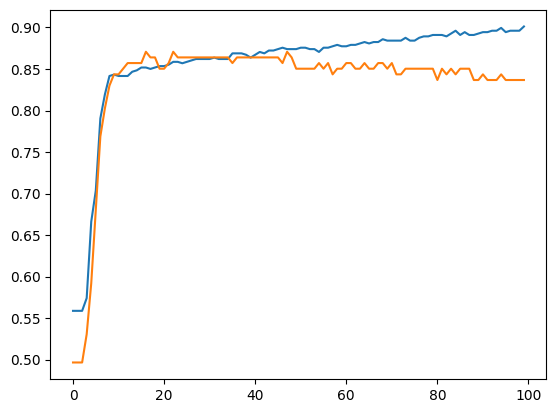

In [349]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [350]:
accuracy_score(y_test,y_pred)

0.8695652173913043

In [351]:
recall_score(y_test,y_pred)

0.8504672897196262

In [352]:
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))
print('Classification Report : \n',classification_report(y_test,y_pred))

Confusion Matrix : 
 [[69  8]
 [16 91]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [333]:
dict={
    'Model':['ANN'],
    'accuracy':[accuracy_score(y_test,y_pred)],
    'Precision':[precision_score(y_test,y_pred)],
    'Recall':[recall_score(y_test,y_pred)]
}
temp=pd.DataFrame(dict)
performance=pd.concat([performance,temp])
performance

,Model,accuracy,Precision,Recall
0,LogisticRegression,0.858696,0.909091,0.841121
0,SVC_linear,0.847826,0.915789,0.813084
1,SVC_rbf,0.847826,0.891089,0.841121
2,SVC_poly,0.820652,0.830357,0.869159
0,KNN_34,0.858696,0.917526,0.831776
0,NaiveBayes,0.847826,0.915789,0.813084
0,DecisionTree,0.858696,0.885714,0.869159
0,RandomForest,0.831522,0.887755,0.813084
0,ANN,0.869565,0.919192,0.850467
